In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

In [2]:
df = pd.read_csv('6_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.992464,-0.574685,-1.459175,-0.716525,-0.882519,-0.520882,-0.871301,-0.957465,-0.826579,-0.711894,-1.492051,0
1,-0.946321,1.740083,-0.788087,-0.684805,-0.877571,-0.520882,-0.871301,-0.927194,-0.826579,-0.710000,0.347470,1
2,-0.945225,-0.574685,-1.459175,-0.615464,-0.859719,-0.520882,0.551490,-0.937858,-0.826579,-0.711894,-1.492051,0
3,-0.923275,1.740083,0.834507,-0.543620,-0.845338,-0.520882,-0.871301,-0.927069,1.226487,-0.690141,0.347470,1
4,-0.833425,-0.574685,-0.788087,-0.499982,-0.850792,-0.520882,-0.871301,-0.907639,-0.826579,-0.711894,-1.492051,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,-0.992464,-0.574685,-1.459175,-0.716525,-0.882519,-0.520882,-0.871301,-0.957465,-0.826579,-0.711894,-1.492051
1,-0.946321,1.740083,-0.788087,-0.684805,-0.877571,-0.520882,-0.871301,-0.927194,-0.826579,-0.710000,0.347470
2,-0.945225,-0.574685,-1.459175,-0.615464,-0.859719,-0.520882,0.551490,-0.937858,-0.826579,-0.711894,-1.492051
3,-0.923275,1.740083,0.834507,-0.543620,-0.845338,-0.520882,-0.871301,-0.927069,1.226487,-0.690141,0.347470
4,-0.833425,-0.574685,-0.788087,-0.499982,-0.850792,-0.520882,-0.871301,-0.907639,-0.826579,-0.711894,-1.492051
...,...,...,...,...,...,...,...,...,...,...,...
4039,0.226260,1.740083,-0.788087,-0.528227,-0.787925,-0.520882,-0.871301,0.219326,-0.826579,-0.690141,0.347470
4040,-0.813743,1.740083,-0.788087,0.233946,1.454180,-0.520882,0.551490,-0.795935,-0.826579,1.693557,0.347470
4041,-0.539349,-0.574685,0.951172,-0.246747,0.177855,-0.520882,0.551490,1.918371,1.226487,-0.711894,1.346619
4042,0.392585,-0.574685,0.834507,-0.684805,-0.821597,-0.520882,-0.871301,-0.810236,-0.826579,-0.711894,1.346619


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1636
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_nb:  [0.6851648351648352, 0.6897404202719407, 0.7163546450017662, 0.6942727647301195, 0.6998021760633036, 0.7070457354758962, 0.6960461285008237, 0.6897404202719407, 0.7407407407407407]
positive_predictive_values_nb:  [0.7166751140395337, 0.7128767123287671, 0.7258944815039418, 0.7052860246198407, 0.7103386809269162, 0.710989010989011, 0.7133956386292835, 0.7420924574209246, 0.7699530516431925]
recalls_nb:  [0.7066466766616691, 0.7304884896125772, 0.7732558139534884, 0.7440794499618029, 0.7386468952734013, 0.754079254079254, 0.7122861586314152, 0.6777777777777778, 0.7454545454545455]
f1_scores_nb:  [0.7116255661801711, 0.7215751525235718, 0.7488270253362528, 0.7241635687732342, 0.7242162653339391, 0.7319004524886877, 0.7128404669260701, 0.7084785133565621, 0.7575057736720554]
specificities_nb:  [0.6589383770591825, 0.6398625429553264, 0.6477007014809041, 0.6359570661896243, 0.6553552492046659, 0.6539473684210526, 0.6777583187390543, 0.7047353760445683, 0.7351351351351352]
np

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2117
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7239010989010989, 0.7815203955500618, 0.8149063935005298, 0.8327152863617635, 0.8783382789317508, 0.892459826946848, 0.9126853377265239, 0.9258343634116193, 0.945679012345679]
positive_predictive_values_dtc:  [0.7557721908671113, 0.8076923076923077, 0.8351063829787234, 0.851937984496124, 0.9092645654250239, 0.906789413118527, 0.932601880877743, 0.9458823529411765, 0.970873786407767]
recalls_dtc:  [0.7357642357642358, 0.7861599546228021, 0.8198433420365535, 0.8363774733637748, 0.8631006346328196, 0.8944381384790011, 0.9042553191489362, 0.9157175398633257, 0.9259259259259259]
f1_scores_dtc:  [0.7456340167046317, 0.7967806841046278, 0.8274044795783926, 0.8440860215053764, 0.8855813953488372, 0.9005714285714286, 0.9182098765432098, 0.9305555555555556, 0.9478672985781991]
specificities_dtc:  [0.7094017094017094, 0.7759674134419552, 0.8090839107005389, 0.8283917340521114, 0.8966267682263329, 0.8900949796472184, 0.9226618705035972, 0.9378378378378378, 0.9682539682539683]
n

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 378
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionW

accuracies_rf:  [0.8118131868131868, 0.8414709517923362, 0.8700105969622042, 0.8879274824886692, 0.907517309594461, 0.9252163164400494, 0.9341021416803954, 0.9468479604449939, 0.9530864197530864]
positive_predictive_values_rf:  [0.8184007707129094, 0.8497807017543859, 0.8734256926952141, 0.894074074074074, 0.9242560865644724, 0.946590909090909, 0.950509461426492, 0.9648351648351648, 0.9661016949152542]
recalls_rf:  [0.8465371200797209, 0.8664058133035215, 0.8925353925353925, 0.9034431137724551, 0.9086879432624113, 0.918412348401323, 0.9341917024320457, 0.9420600858369099, 0.9539748953974896]
f1_scores_rf:  [0.8322312025471467, 0.8580127318018267, 0.8828771483131763, 0.8987341772151899, 0.9164059007599463, 0.932288752098489, 0.9422799422799423, 0.9533116178067318, 0.96]
specificities_rf:  [0.7691365584813227, 0.8106427090532136, 0.8425998433829287, 0.8689275893675527, 0.9060402684563759, 0.9338959212376934, 0.9339805825242719, 0.9533527696793003, 0.9518072289156626]
npvs_rf:  [0.8030690

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 964
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

accuracies_knn:  [0.6912087912087912, 0.703955500618047, 0.7230660543977393, 0.7292954264524104, 0.7453016815034619, 0.738566131025958, 0.7372322899505767, 0.7330037082818294, 0.745679012345679]
positive_predictive_values_knn:  [0.7216135458167331, 0.724676724137931, 0.7538461538461538, 0.7545520757465404, 0.7728459530026109, 0.7624190064794817, 0.7678832116788321, 0.7658643326039387, 0.7610619469026548]
recalls_knn:  [0.7194637537239325, 0.7505580357142857, 0.7461928934010152, 0.7640117994100295, 0.7775831873905429, 0.7766776677667767, 0.7667638483965015, 0.7625272331154684, 0.7782805429864253]
f1_scores_knn:  [0.720537046245649, 0.737390350877193, 0.75, 0.7592524734334921, 0.7752073330423396, 0.7694822888283379, 0.7673231218088986, 0.7641921397379913, 0.7695749440715883]
specificities_knn:  [0.6562115621156211, 0.6461218836565097, 0.6940239043824701, 0.6853408029878618, 0.7034090909090909, 0.689703808180536, 0.6988636363636364, 0.6942857142857143, 0.7065217391304348]
npvs_knn:  [0.65

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 2600
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_svm:  [0.7134615384615385, 0.7163164400494437, 0.7326033203814907, 0.7466007416563659, 0.7373887240356083, 0.7472187886279357, 0.7561779242174629, 0.754017305315204, 0.7555555555555555]
positive_predictive_values_svm:  [0.7196728759654702, 0.7230215827338129, 0.737061273051755, 0.7567567567567568, 0.7479541734860884, 0.7696335078534031, 0.7810734463276836, 0.7890295358649789, 0.7982832618025751]
recalls_svm:  [0.7880597014925373, 0.7877939529675252, 0.7972972972972973, 0.8053097345132744, 0.8038698328935796, 0.7954545454545454, 0.7968299711815562, 0.7906976744186046, 0.7815126050420168]
f1_scores_svm:  [0.7523153645214913, 0.7540192926045016, 0.7659969088098918, 0.7802786709539121, 0.77490462060195, 0.7823310271420969, 0.7888730385164051, 0.7898627243928195, 0.7898089171974523]
specificities_svm:  [0.6214723926380368, 0.6282758620689655, 0.653876272513704, 0.6722689075630253, 0.6519774011299435, 0.6829971181556196, 0.7019230769230769, 0.7023809523809523, 0.718562874251497]
n

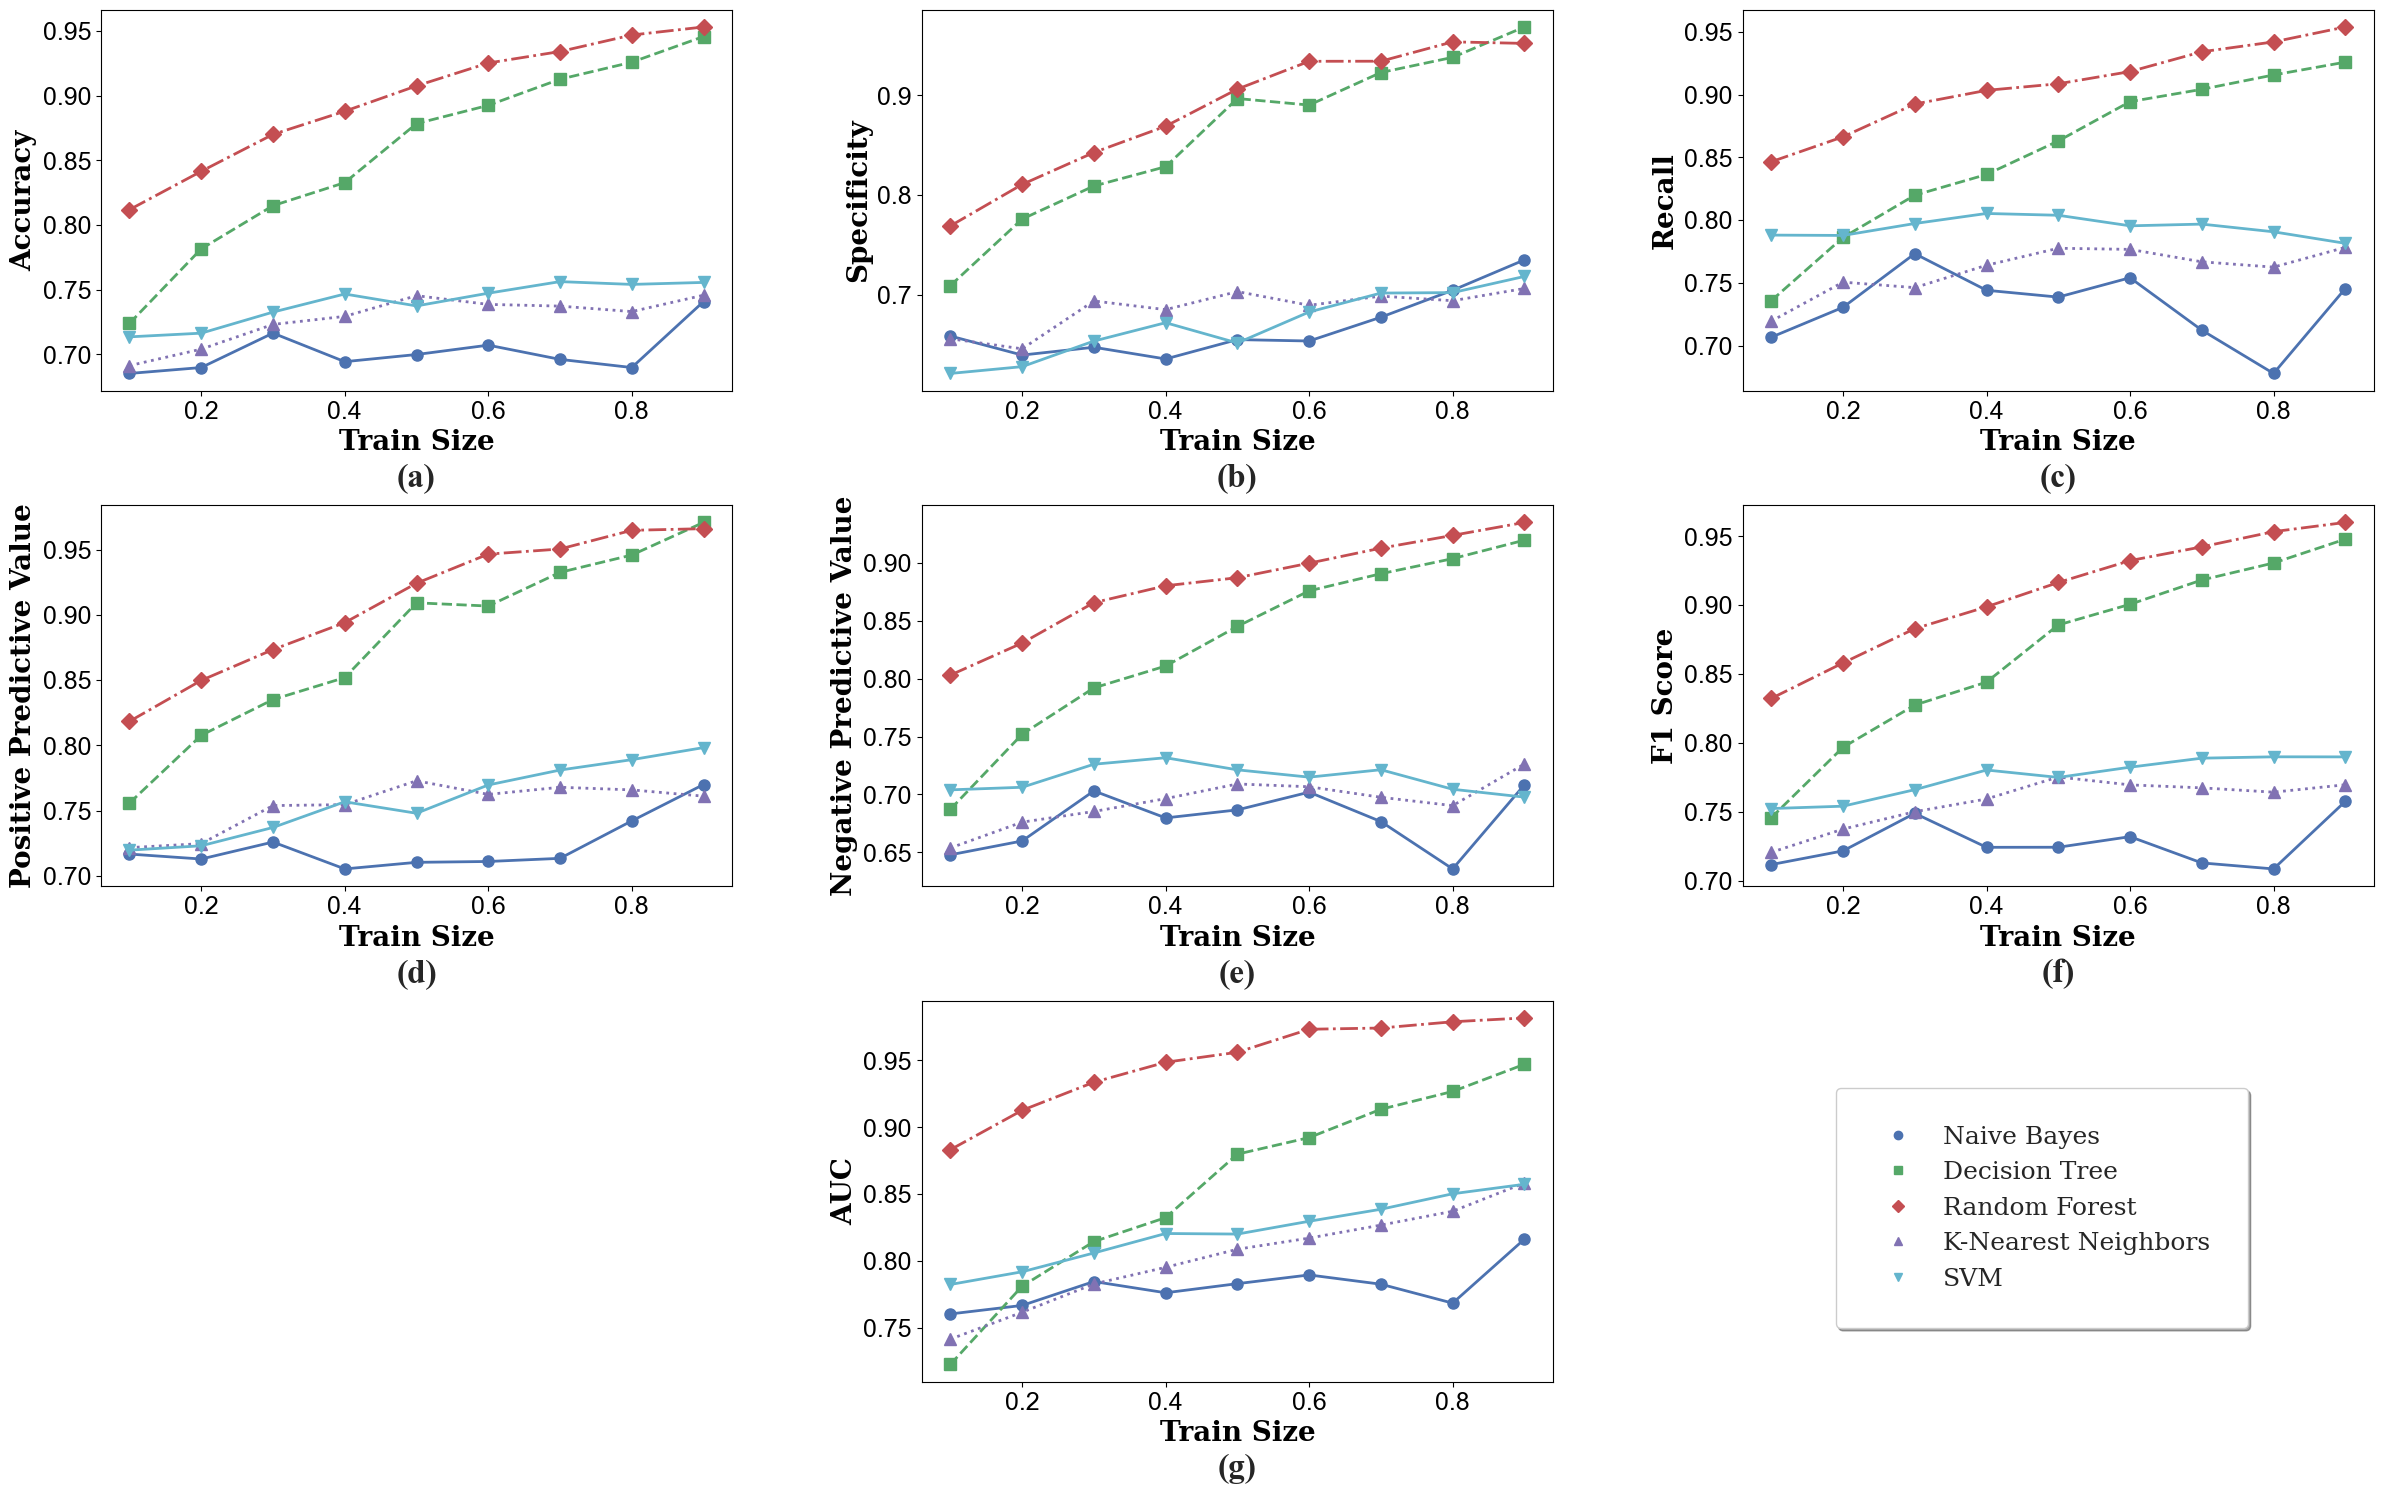

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(24, 15))  # Adjusted figsize for better fit
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=20, fontweight='bold', family='serif')

# Add label (a)
axes[0, 0].text(0.5, -0.25, '(a)', transform=axes[0, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=20, fontweight='bold', family='serif')

# Add label (b)
axes[0, 1].text(0.5, -0.25, '(b)', transform=axes[0, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=20, fontweight='bold', family='serif')

# Add label (c)
axes[0, 2].text(0.5, -0.25, '(c)', transform=axes[0, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[1, 0].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Positive Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (d)
axes[1, 0].text(0.5, -0.25, '(d)', transform=axes[1, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 1].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('Negative Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (e)
axes[1, 1].text(0.5, -0.25, '(e)', transform=axes[1, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 2].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('F1 Score', fontsize=20, fontweight='bold', family='serif')

# Add label (f)
axes[1, 2].text(0.5, -0.25, '(f)', transform=axes[1, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[2, 1].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[2, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[2, 1].set_ylabel('AUC', fontsize=20, fontweight='bold', family='serif')

# Add label (g)
axes[2, 1].text(0.5, -0.25, '(g)', transform=axes[2, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Hide any unused subplots
axes[2, 0].axis('off')
axes[2, 2].axis('off')

# Create a dummy plot to include the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(.95, 0.03), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 18, 'family': 'serif'})
dummy_plot.axis('off')  # Hide the axis for the dummy plot

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Images/7_ml_classifier_metrics.png', transparent=True)
# Show plot
plt.show()

In [11]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) / 9)
print('dtc: ', sum(accuracies_dtc) / 9)
print('rf: ', sum(accuracies_rf) / 9)
print('knn: ', sum(accuracies_knn)/ 9)
print('svm: ', sum(accuracies_svm) / 9)

Average Accuracy: 
nb:  0.7021008740245962
dtc:  0.8564488881862083
rf:  0.8975547073299315
knn:  0.7274787328649437
svm:  0.7399267042556228


In [12]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) / 9)
print('dtc: ', sum(specificities_dtc) / 9)
print('rf: ', sum(specificities_rf) / 9)
print('knn: ', sum(specificities_knn) / 9)
print('svm: ', sum(specificities_svm) / 9)

Average Specificity: 
nb:  0.6677100150255016
dtc:  0.8598133546739187
rf:  0.885598163455369
knn:  0.6860535713346527
svm:  0.6704149841805357


In [13]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) / 9)
print('dtc: ', sum(recalls_dtc) / 9)
print('rf: ', sum(recalls_rf) / 9)
print('knn: ', sum(recalls_knn) / 9)
print('svm: ', sum(recalls_svm) / 9)

Average Recall: 
nb:  0.7314127846006592
dtc:  0.8535091737597081
rf:  0.9073609350023634
knn:  0.7602287735449975
svm:  0.7940917016956597


In [14]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) / 9)
print('dtc: ', sum(positive_predictive_values_dtc) / 9)
print('rf: ', sum(positive_predictive_values_rf) / 9)
print('knn: ', sum(positive_predictive_values_knn) / 9)
print('svm: ', sum(positive_predictive_values_svm) / 9)

Average PPV: 
nb:  0.7230556857890458
dtc:  0.8795467627560559
rf:  0.9097749506743195
knn:  0.7538625500238751
svm:  0.7580540459825027


In [15]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) / 9)
print('dtc: ', sum(npvs_dtc) / 9)
print('rf: ', sum(npvs_rf) / 9)
print('knn: ', sum(npvs_knn) / 9)
print('svm: ', sum(npvs_svm) / 9)

Average NPV: 
nb:  0.6777437086616694
dtc:  0.8307656072350642
rf:  0.8819937439493529
knn:  0.69348943535404
svm:  0.7141816598698051


In [16]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) / 9)
print('dtc: ', sum(f1_scores_dtc) / 9)
print('rf: ', sum(f1_scores_rf) / 9)
print('knn: ', sum(f1_scores_knn) / 9)
print('svm: ', sum(f1_scores_svm) / 9)

Average F1-Score: 
nb:  0.7267925316211715
dtc:  0.866298972943362
rf:  0.9084601636469386
knn:  0.7569955220050544
svm:  0.7753767294156133


In [17]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) / 9)
print('dtc: ', sum(aucs_dtc) / 9)
print('rf: ', sum(aucs_rf) / 9)
print('knn: ', sum(aucs_knn) / 9)
print('svm: ', sum(aucs_svm) / 9)

Average AUC: 
nb:  0.7808336530648419
dtc:  0.8566612642168135
rf:  0.9491704041133366
knn:  0.8032264161222962
svm:  0.8218494630771511
